In [33]:
import ROOT as rt
import matplotlib.pyplot as plt
import numpy as np
from distance_in_fiber import distance_in_mat
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
# Open Tree
in_file = rt.TFile("data/collected_charge/digitized/x_1.root","READ")
tree = in_file.Get("DetectorOutput")
in_file.Print()


In [3]:

num_entires = tree.GetEntries()
gpsPosY = np.zeros(num_entires)
collected_charge = np.zeros(num_entires)
tmp = np.zeros((num_entires, 128))
i=0
for event in tree:
    gpsPosY[i] = event.gpsPosY
    tmp[i][:] = event.eventReadout
    i = i + 1
collected_charge = tmp.sum(axis=1)

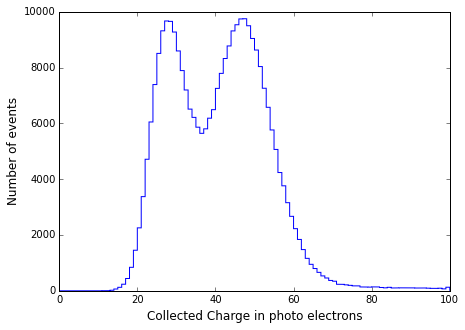

In [81]:
plt.hist(collected_charge, range=(0,100), bins=100, histtype="step")
plt.xlabel("Collected Charge in photo electrons", fontsize="large")
plt.ylabel("Number of events",fontsize="large")
plt.gcf().set_size_inches((7,5))
plt.savefig("collected_charge_total.pdf")


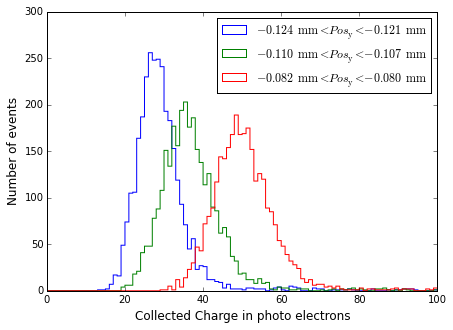

In [100]:
#Create Binning of Hisotgramms
nBins = 100
bin_min = gpsPosY.min()
bin_max = gpsPosY.max()
bin_width = (bin_max-bin_min)/nBins
plot_bins = [5, 10,20,]
low_edge = bin_min

means = np.zeros(nBins)
err = np.zeros(nBins)
for i in range(nBins):
    cut = np.logical_and(gpsPosY>low_edge, low_edge+bin_width > gpsPosY)
    selection = collected_charge[cut]
    if i in plot_bins:
        label = r"$ %.3f\,\mathrm{mm} < Pos_\mathrm{y} < %.3f\,\mathrm{mm } $ "% (low_edge,low_edge+bin_width)
        plt.hist(selection, range=(0,100), bins=100, histtype="step", label= label)
    low_edge = low_edge+bin_width
    means[i] = np.mean(selection)
    err[i] = selection.std(ddof=1)/np.sqrt(selection.size)

plt.legend()
plt.xlabel("Collected Charge in photo electrons", fontsize="large")
plt.ylabel("Number of events",fontsize="large")
plt.gcf().set_size_inches((7,5))
plt.savefig("collected_charge_binned.pdf")


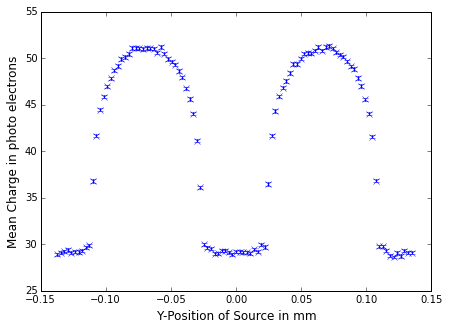

In [101]:
y_pos = np.arange(bin_min,bin_max, bin_width)
plt.errorbar(y_pos,means,fmt='x', yerr=err)

plt.ylabel("Mean Charge in photo electrons", fontsize="large")
plt.xlabel("Y-Position of Source in mm",fontsize="large")
plt.gcf().set_size_inches((7,5))
plt.savefig("collected_charge_mean.pdf")

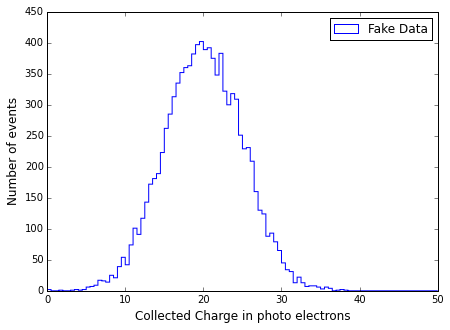

In [102]:
#Fake testbeam data

test_beam_charge = np.random.normal(loc=20, size=10000, scale=5)
plt.hist(test_beam_charge, range=(0,50), bins=100, histtype="step", label="Fake Data")
plt.xlabel("Collected Charge in photo electrons", fontsize="large")
plt.ylabel("Number of events",fontsize="large")
plt.gcf().set_size_inches((7,5))
plt.legend()
plt.savefig("testbeam_fake.pdf")